### 1. Setup and Import Libraries

In [33]:
import sys
sys.path.append('../scripts') 
from Train_model import * 
import warnings
warnings.filterwarnings("ignore")


### 2. Define File Paths and Load Data

In [34]:
# Define paths to local files
file_paths = {
    "TSLA": "../data/TSLA_proccessed_data.csv",
    "SPY": "../data/SPY_proccessed_data.csv",
    "BND": "../data/BND_proccessed_data.csv"
}

# Load data function
def load_data(file_path):
    return pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')

# Load all datasets into a dictionary
data_dict = {ticker: load_data(path) for ticker, path in file_paths.items()}


### 3. Data Preprocessing and Feature Engineering

In [35]:
# Preprocess each dataset
for ticker, data in data_dict.items():
    data_dict[ticker] = preprocess_data(data)
    print(f'{ticker} preprocessed and feature engineered data')
    display(data_dict[ticker].head())
    print(data_dict[ticker]['Adj Close'].isna().sum())



TSLA preprocessed and feature engineered data


,Price,Adj Close,Close,High,Low,Open,Volume,Daily Return,Return,Volatility,Rolling_Mean,Lag_1,Lag_2,Lag_3
Date,,,,,,,,,,,,,,
2015-02-17 00:00:00+00:00,2015-02-17 00:00:00+00:00,13.623333,13.623332977294922,13.713333129882812,13.433333396911621,13.713333129882812,59694000,0.002846,0.002846,0.022889,13.754600,13.584667,13.525333,14.186667
2015-02-18 00:00:00+00:00,2015-02-18 00:00:00+00:00,13.630667,13.630666732788086,13.744667053222656,13.506667137145996,13.611332893371582,40704000,0.000538,0.000538,0.021611,13.742089,13.623333,13.584667,13.525333
2015-02-19 00:00:00+00:00,2015-02-19 00:00:00+00:00,14.114000,14.11400032043457,14.162667274475098,13.583333015441895,13.666666984558105,77311500,0.035459,0.035459,0.022576,13.743044,13.630667,13.623333,13.584667
2015-02-20 00:00:00+00:00,2015-02-20 00:00:00+00:00,14.474000,14.473999977111816,14.506667137145996,13.987333297729492,14.052000045776367,89731500,0.025507,0.025507,0.023035,13.756733,14.114000,13.630667,13.623333
2015-02-23 00:00:00+00:00,2015-02-23 00:00:00+00:00,13.822667,13.822667121887207,14.546667098999023,13.755332946777344,14.37733268737793,127497000,-0.045000,-0.045000,0.024532,13.749445,14.474000,14.114000,13.630667


0
SPY preprocessed and feature engineered data


,Price,Adj Close,Close,High,Low,Open,Volume,Daily Return,Return,Volatility,Rolling_Mean,Lag_1,Lag_2,Lag_3
Date,,,,,,,,,,,,,,
2015-02-17 00:00:00+00:00,2015-02-17 00:00:00+00:00,177.118896,210.11000061035156,210.32000732421875,209.10000610351562,209.39999389648438,76968200,0.001573,0.001573,0.009988,171.852814,176.840759,176.115799,174.438248
2015-02-18 00:00:00+00:00,2015-02-18 00:00:00+00:00,177.135849,210.1300048828125,210.22000122070312,209.33999633789062,209.66000366210938,80652900,0.000096,0.000096,0.009334,172.089132,177.118896,176.840759,176.115799
2015-02-19 00:00:00+00:00,2015-02-19 00:00:00+00:00,177.009338,209.97999572753906,210.4199981689453,209.24000549316406,209.41000366210938,91462500,-0.000714,-0.000714,0.009119,172.374622,177.135849,177.118896,176.840759
2015-02-20 00:00:00+00:00,2015-02-20 00:00:00+00:00,178.071503,211.24000549316406,211.3300018310547,208.72999572753906,209.47999572753906,140896400,0.006001,0.006001,0.008930,172.625550,177.009338,177.135849,177.118896
2015-02-23 00:00:00+00:00,2015-02-23 00:00:00+00:00,178.046219,211.2100067138672,211.2100067138672,210.47999572753906,210.94000244140625,74411100,-0.000142,-0.000142,0.008387,172.774760,178.071503,177.009338,177.135849


0
BND preprocessed and feature engineered data


,Price,Adj Close,Close,High,Low,Open,Volume,Daily Return,Return,Volatility,Rolling_Mean,Lag_1,Lag_2,Lag_3
Date,,,,,,,,,,,,,,
2015-02-17 00:00:00+00:00,2015-02-17 00:00:00+00:00,63.348412,82.47000122070312,82.80000305175781,82.44000244140625,82.77999877929688,5281500,-0.003986,-0.003986,0.002640,64.003706,63.601921,63.747864,63.717136
2015-02-18 00:00:00+00:00,2015-02-18 00:00:00+00:00,63.525093,82.69999694824219,82.81999969482422,82.48999786376953,82.58999633789062,3813000,0.002789,0.002789,0.002636,64.003117,63.348412,63.601921,63.747864
2015-02-19 00:00:00+00:00,2015-02-19 00:00:00+00:00,63.471352,82.62999725341797,82.80999755859375,82.5999984741211,82.73999786376953,1322700,-0.000846,-0.000846,0.002582,63.994604,63.525093,63.348412,63.601921
2015-02-20 00:00:00+00:00,2015-02-20 00:00:00+00:00,63.486694,82.6500015258789,82.87999725341797,82.52999877929688,82.75,3145800,0.000242,0.000242,0.002579,63.985324,63.471352,63.525093,63.348412
2015-02-23 00:00:00+00:00,2015-02-23 00:00:00+00:00,63.617294,82.81999969482422,82.88999938964844,82.75,82.80000305175781,3952700,0.002057,0.002057,0.002595,63.983722,63.486694,63.471352,63.525093


0


### 4. ARIMA and SARIMA Models for TSLA

ADF Test p-value: 0.68924 | Stationary: False
Applied differencing 1 time(s)
ADF Test p-value: 0.00000 | Stationary: True
Tuning ARIMA parameters using auto_arima...
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.68 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=13652.657, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=13017.965, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.91 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=13650.657, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=12787.234, Time=0.33 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=12633.362, Time=0.43 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=12572.737, Time=0.48 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=12531.891, Time=0.68 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=3.14 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=4.06 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=12529.891, Time=0.96 sec
 ARIMA(4,1,

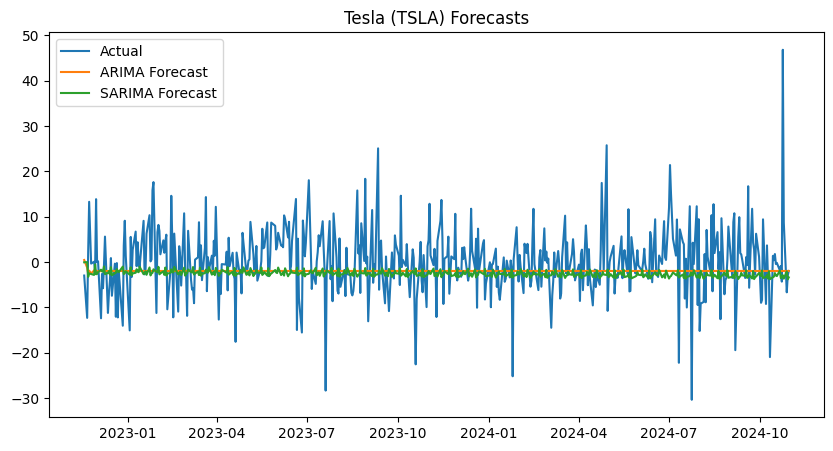

In [36]:
# Load the data for Tesla
tsla_data = data_dict['TSLA']

# Train ARIMA and SARIMA for Tesla (TSLA)
arima_forecast_tsla, sarima_forecast_tsla, test_tsla = train_arima_models(tsla_data,'TSLA')

# Plot Tesla Forecasts
plt.figure(figsize=(10, 5))
plt.plot(test_tsla.index, test_tsla, label="Actual")
plt.plot(test_tsla.index, arima_forecast_tsla, label="ARIMA Forecast")
plt.plot(test_tsla.index, sarima_forecast_tsla, label="SARIMA Forecast")
plt.legend()
plt.title("Tesla (TSLA) Forecasts")
plt.show()


### 5. LSTM Model for TSLA

In [37]:
# Train and evaluate LSTM model for Tesla (TSLA)
feature_cols = ['Adj Close', 'Return', 'Volatility', 'Rolling_Mean', 'Lag_1', 'Lag_2', 'Lag_3']
train_lstm_model(tsla_data, feature_cols,'TSLA')


Epoch 1/30 Loss: 0.0316
Epoch 2/30 Loss: 0.0015
Epoch 3/30 Loss: 0.0009
Epoch 4/30 Loss: 0.0003
Epoch 5/30 Loss: 0.0003
Epoch 6/30 Loss: 0.0026
Epoch 7/30 Loss: 0.0009
Epoch 8/30 Loss: 0.0055
Epoch 9/30 Loss: 0.0038
Epoch 10/30 Loss: 0.0029
Epoch 11/30 Loss: 0.0001
Epoch 12/30 Loss: 0.0008
Epoch 13/30 Loss: 0.0003
Epoch 14/30 Loss: 0.0005
Epoch 15/30 Loss: 0.0008
Epoch 16/30 Loss: 0.0012
Epoch 17/30 Loss: 0.0000
Epoch 18/30 Loss: 0.0005
Epoch 19/30 Loss: 0.0008
Epoch 20/30 Loss: 0.0000
Epoch 21/30 Loss: 0.0043
Epoch 22/30 Loss: 0.0006
Epoch 23/30 Loss: 0.0011
Epoch 24/30 Loss: 0.0000
Epoch 25/30 Loss: 0.0003
Epoch 26/30 Loss: 0.0002
Epoch 27/30 Loss: 0.0000
Epoch 28/30 Loss: 0.0003
Epoch 29/30 Loss: 0.0021
Epoch 30/30 Loss: 0.0014
Model saved as 'TSLA_lstm_model.pth'
LSTM MAE: 0.0278
LSTM RMSE: 0.0383
LSTM MAPE: 94.00%


(LSTMModel(
   (lstm): LSTM(7, 50, batch_first=True)
   (linear): Linear(in_features=50, out_features=1, bias=True)
 ),
 array([[-4.85292792e-01],
        [-4.54956800e-01],
        [-4.74677384e-01],
        [-4.62791651e-01],
        [-4.30017829e-01],
        [-4.39873219e-01],
        [-4.17524040e-01],
        [-4.17999953e-01],
        [-4.24902171e-01],
        [-3.74571025e-01],
        [-3.93983930e-01],
        [-4.02607113e-01],
        [-3.69722903e-01],
        [-3.16525877e-01],
        [-3.23420465e-01],
        [-3.22357744e-01],
        [-2.32636154e-01],
        [-1.38935268e-01],
        [-2.06389561e-01],
        [-1.69119328e-01],
        [-1.30385309e-01],
        [-1.02255553e-01],
        [-1.00532994e-01],
        [-7.97907189e-02],
        [-7.44733885e-02],
        [-5.53109385e-02],
        [-2.89956182e-02],
        [-8.23187828e-02],
        [-9.17993188e-02],
        [-1.76893454e-02],
        [-1.10676559e-03],
        [-6.10389449e-02],
        [-2.4897

### 6. ARIMA and SARIMA Models for SPY

ADF Test p-value: 0.99402 | Stationary: False
Applied differencing 1 time(s)
ADF Test p-value: 0.00000 | Stationary: True
Tuning ARIMA parameters using auto_arima...
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.28 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=11894.956, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=11128.079, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.29 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=11892.956, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=10900.667, Time=0.22 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=10806.200, Time=0.27 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=10699.754, Time=0.36 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=10683.302, Time=0.44 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=3.43 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=2.19 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=10681.302, Time=0.15 sec
 ARIMA(4,1,

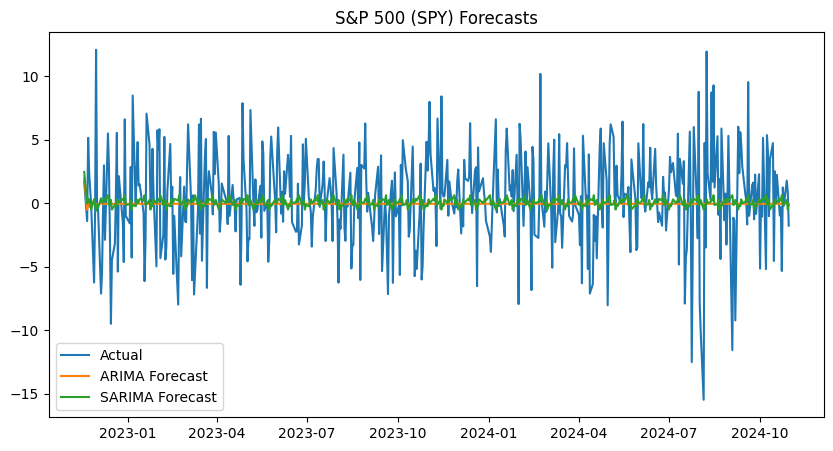

In [38]:
# Load the data for S&P 500
spy_data = data_dict['SPY']

# Train ARIMA and SARIMA for S&P 500 (SPY)
arima_forecast_spy, sarima_forecast_spy, test_spy = train_arima_models(spy_data,'SPY')


# Plot S&P 500 Forecasts
plt.figure(figsize=(10, 5))
plt.plot(test_spy.index, test_spy, label="Actual")
plt.plot(test_spy.index, arima_forecast_spy, label="ARIMA Forecast")
plt.plot(test_spy.index, sarima_forecast_spy, label="SARIMA Forecast")
plt.legend()
plt.title("S&P 500 (SPY) Forecasts")
plt.show()


### 7. LSTM Model for SPY

In [39]:
# Train and evaluate LSTM model for S&P 500 (SPY)
train_lstm_model(spy_data, feature_cols, 'SPY')


Epoch 1/30 Loss: 0.0270
Epoch 2/30 Loss: 0.0004
Epoch 3/30 Loss: 0.0004
Epoch 4/30 Loss: 0.0005
Epoch 5/30 Loss: 0.0025
Epoch 6/30 Loss: 0.0007
Epoch 7/30 Loss: 0.0002
Epoch 8/30 Loss: 0.0004
Epoch 9/30 Loss: 0.0006
Epoch 10/30 Loss: 0.0008
Epoch 11/30 Loss: 0.0004
Epoch 12/30 Loss: 0.0002
Epoch 13/30 Loss: 0.0004
Epoch 14/30 Loss: 0.0011
Epoch 15/30 Loss: 0.0003
Epoch 16/30 Loss: 0.0011
Epoch 17/30 Loss: 0.0001
Epoch 18/30 Loss: 0.0001
Epoch 19/30 Loss: 0.0001
Epoch 20/30 Loss: 0.0007
Epoch 21/30 Loss: 0.0001
Epoch 22/30 Loss: 0.0001
Epoch 23/30 Loss: 0.0002
Epoch 24/30 Loss: 0.0002
Epoch 25/30 Loss: 0.0000
Epoch 26/30 Loss: 0.0000
Epoch 27/30 Loss: 0.0004
Epoch 28/30 Loss: 0.0005
Epoch 29/30 Loss: 0.0001
Epoch 30/30 Loss: 0.0006
Model saved as 'SPY_lstm_model.pth'
LSTM MAE: 0.0542
LSTM RMSE: 0.0774
LSTM MAPE: 13.11%


(LSTMModel(
   (lstm): LSTM(7, 50, batch_first=True)
   (linear): Linear(in_features=50, out_features=1, bias=True)
 ),
 array([[0.00692224],
        [0.01688225],
        [0.0045904 ],
        [0.0305563 ],
        [0.03183275],
        [0.04048248],
        [0.0577753 ],
        [0.06487735],
        [0.07157555],
        [0.07237883],
        [0.0558741 ],
        [0.0466899 ],
        [0.06666714],
        [0.08009154],
        [0.07950436],
        [0.08191296],
        [0.09686083],
        [0.10184789],
        [0.08906379],
        [0.10665348],
        [0.1208225 ],
        [0.13973597],
        [0.13170695],
        [0.12730615],
        [0.1443767 ],
        [0.13306776],
        [0.12262467],
        [0.12484076],
        [0.13735238],
        [0.13694653],
        [0.141651  ],
        [0.12775515],
        [0.12487943],
        [0.10104911],
        [0.09611061],
        [0.09933353],
        [0.0839307 ],
        [0.08532427],
        [0.08004921],
        [0.0740623 ],


### 8. ARIMA and SARIMA Models for BND

ADF Test p-value: 0.55279 | Stationary: False
Applied differencing 1 time(s)
ADF Test p-value: 0.00000 | Stationary: True
Tuning ARIMA parameters using auto_arima...
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=3.28 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1183.444, Time=0.15 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=760.185, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.01 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1181.445, Time=0.10 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=505.931, Time=0.28 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=291.899, Time=0.36 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=144.300, Time=0.51 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=92.124, Time=0.64 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=-159.872, Time=3.11 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.97 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.90 sec
 ARIMA(4,1,2)(0,0,0)[0] i

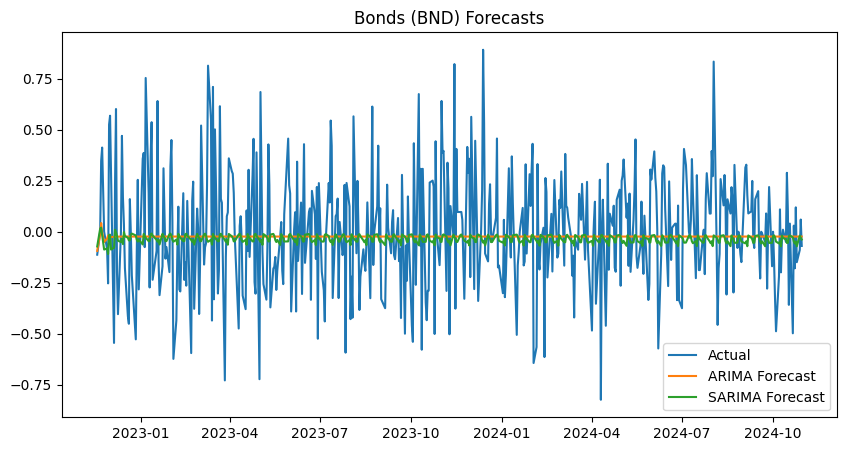

In [40]:
# Load the data for Bonds
bnd_data = data_dict['BND']

# Train ARIMA and SARIMA for Bonds (BND)
arima_forecast_bnd, sarima_forecast_bnd, test_bnd = train_arima_models(bnd_data,'BND')

# Plot Bonds Forecasts
plt.figure(figsize=(10, 5))
plt.plot(test_bnd.index, test_bnd, label="Actual")
plt.plot(test_bnd.index, arima_forecast_bnd, label="ARIMA Forecast")
plt.plot(test_bnd.index, sarima_forecast_bnd, label="SARIMA Forecast")
plt.legend()
plt.title("Bonds (BND) Forecasts")
plt.show()

### 9. LSTM Model for BND



In [41]:
# Train and evaluate LSTM model for Bonds (BND)
train_lstm_model(bnd_data, feature_cols, 'BND')


Epoch 1/30 Loss: 0.0453
Epoch 2/30 Loss: 0.0023
Epoch 3/30 Loss: 0.0268
Epoch 4/30 Loss: 0.0105
Epoch 5/30 Loss: 0.0029
Epoch 6/30 Loss: 0.0016
Epoch 7/30 Loss: 0.0022
Epoch 8/30 Loss: 0.0014
Epoch 9/30 Loss: 0.0006
Epoch 10/30 Loss: 0.0017
Epoch 11/30 Loss: 0.0004
Epoch 12/30 Loss: 0.0021
Epoch 13/30 Loss: 0.0006
Epoch 14/30 Loss: 0.0004
Epoch 15/30 Loss: 0.0018
Epoch 16/30 Loss: 0.0012
Epoch 17/30 Loss: 0.0002
Epoch 18/30 Loss: 0.0003
Epoch 19/30 Loss: 0.0007
Epoch 20/30 Loss: 0.0018
Epoch 21/30 Loss: 0.0002
Epoch 22/30 Loss: 0.0003
Epoch 23/30 Loss: 0.0003
Epoch 24/30 Loss: 0.0005
Epoch 25/30 Loss: 0.0005
Epoch 26/30 Loss: 0.0005
Epoch 27/30 Loss: 0.0005
Epoch 28/30 Loss: 0.0023
Epoch 29/30 Loss: 0.0002
Epoch 30/30 Loss: 0.0002
Model saved as 'BND_lstm_model.pth'
LSTM MAE: 0.0278
LSTM RMSE: 0.0345
LSTM MAPE: 111.08%


(LSTMModel(
   (lstm): LSTM(7, 50, batch_first=True)
   (linear): Linear(in_features=50, out_features=1, bias=True)
 ),
 array([[-0.37479004],
        [-0.33338493],
        [-0.33691913],
        [-0.2562179 ],
        [-0.22733995],
        [-0.24818668],
        [-0.20588589],
        [-0.14710659],
        [-0.16817111],
        [-0.17690551],
        [-0.11210898],
        [-0.12587735],
        [-0.15965569],
        [-0.17783506],
        [-0.15047288],
        [-0.14467973],
        [-0.16006517],
        [-0.16770774],
        [-0.18769713],
        [-0.15760487],
        [-0.11222114],
        [-0.10499375],
        [-0.16369641],
        [-0.20652738],
        [-0.21847454],
        [-0.2114783 ],
        [-0.24318233],
        [-0.27538586],
        [-0.258521  ],
        [-0.28214177],
        [-0.29856154],
        [-0.32425678],
        [-0.31092018],
        [-0.36895353],
        [-0.35815254],
        [-0.33421457],
        [-0.37250426],
        [-0.3622237 ],
      